In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("Datos/pokemon2.csv", nrows = 100000)

In [2]:
# Normalizamos los tipos, generando una columna por cada uno de ellos, ya que no importa el orden del tipo
#que seas
types1 = pd.get_dummies(df["Type 1"])
types2 = pd.get_dummies(df["Type 2"])
# Unimos las columnas de tipo1 y tipo2
types = types1 | types2
#Juntamos el df de los pokemons y los nuevos tipos
df_clean = pd.merge(df, types, left_index=True, right_index=True)
#Limpieza de pokemons con campos vacios
df_clean.dropna(inplace=True)
# Eliminamos las columnas antiguas de los tipos
df_clean.drop(["Type 1", "Type 2"], axis = 1,inplace= True)
df_clean


,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,45,49,49,65,65,45,1,False,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,1,False,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,1,False,...,0,1,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,80,100,123,122,120,80,1,False,...,0,1,0,0,0,1,0,0,0,0
6,7,Charizard,78,84,78,109,85,100,1,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,True,...,0,0,0,0,0,0,0,1,0,0
796,797,Mega Diancie,50,160,110,160,110,110,6,True,...,0,0,0,0,0,0,0,1,0,0
797,798,Hoopa Confined,80,110,60,150,130,70,6,True,...,1,0,0,0,0,0,1,0,0,0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,True,...,0,0,0,0,0,0,1,0,0,0


In [3]:
# SVM- SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
import numpy as np
import pandas as pd

from joblib import parallel_backend
from sklearn.preprocessing import StandardScaler

df_fights = pd.read_csv("Datos/combats.csv", nrows = 100000)

In [4]:
# Limpieza y configuración de dataframes
# Se cambia el nombre de ambos IDs
df_fights.rename(columns = {'First_pokemon':'ID1', 'Second_pokemon':'ID2',
 'Winner': 'isFirstWinner'}, inplace = True)
df_fights.loc[df_fights['isFirstWinner'] == df_fights['ID1'], 'isFirstWinner'] = True
df_fights.loc[df_fights['isFirstWinner'] == df_fights['ID2'], 'isFirstWinner'] = False
df_fights.dropna(inplace=True)


In [5]:
df_SVM = df_clean
# Igualamos el nombre de la columna del id a ID1
df_SVM = df_SVM.rename(columns = {'#':'ID1'})
#Añadimos todos los campos del 1er pokemon a la tabla
df_fights = df_fights.merge(df_SVM, on='ID1')

# Igualamos el nombre de la columna del id a ID2
df_SVM.rename(columns = {'ID1':'ID2'}, inplace= True)
#Añadimos todos los campos del 1er pokemon a la tabla
df_fights = df_fights.merge(df_SVM, on='ID2')


df_fights=df_fights.sample(frac = 0.4, random_state= 0)

In [6]:

df_fights =  df_fights[['isFirstWinner', 'HP_x', 'Attack_x',
       'Defense_x', 'Sp. Atk_x', 'Sp. Def_x', 'Speed_x', 'HP_y', 'Attack_y', 'Defense_y', 'Sp. Atk_y',
       'Sp. Def_y', 'Speed_y']]



In [7]:
n_fights = len(df_fights.axes[0])
n_train = int(n_fights * 0.9)
n_test = n_fights - n_train

df_train = df_fights.head(n_train)
df_test = df_fights.tail(n_test)


print(n_train,n_test)

4851 539


In [8]:
# Variable respuesta
Y_train = df_train["isFirstWinner"] == True
Y_test = df_test["isFirstWinner"] == True

# Entrenando nuestro modelo
clf = SVC(kernel = "poly", cache_size= 4000, C=5) # Probad con los distintos kernels: kernel = "linear"; kernel = "poly"; kernel = "rbf"; kernel = "sigmoid"
with parallel_backend('threading', n_jobs=-1):
    clf = clf.fit(df_train.drop(["isFirstWinner"], axis = 1), Y_train)
    Y_pred_test = clf.predict(df_test.drop(["isFirstWinner"], axis = 1))

[[249  21]
 [ 34 235]]


Text(33.0, 0.5, 'true')

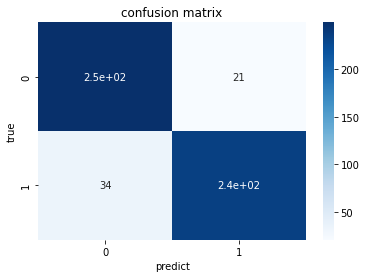

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(Y_test, Y_pred_test)
print(confusion_matrix)
f,ax=plt.subplots()

sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="Blues") #Dibuja un mapa de calor

ax.set_title('confusion matrix') #título
ax.set_xlabel('predict') #eje x
ax.set_ylabel('true') #eje y